# Importing Some Libraries

In [231]:
import pandas as pd
import numpy as np
import random
from sklearn.utils import shuffle
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt

# Importing data

## Getting data from drive

Only run these cell if you're using colab and have uploaded data to the drive

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!cp /content/drive/MyDrive/Intrusion_detection_data/*.zip /content/

## Unzipping data

Run these cells if the data is zipped

In [4]:
#import zipfile

In [5]:
#zip=zipfile.ZipFile('biflow_features.zip')
#zip1=zipfile.ZipFile('uniflow_features.zip')
#zip2=zipfile.ZipFile('packet_features.zip')

In [6]:
#zip.extractall('biflow_features')
#zip1.extractall('uniflow_features')
#zip2.extractall('packet_features')

## Importing bi-directional data

In [7]:
bi_brute=pd.read_csv('biflow_features/biflow_mqtt_bruteforce.csv')

In [8]:
bi_normal=pd.read_csv('biflow_features/biflow_normal.csv')

In [9]:
bi_scan=pd.read_csv('biflow_features/biflow_scan_A.csv')

In [10]:
bi_scanSU=pd.read_csv('biflow_features/biflow_scan_sU.csv')

In [11]:
bi_sparta=pd.read_csv('biflow_features/biflow_sparta.csv')

### Converting bool is_attack to respective attack names

This function changes the bool is_attack values to their own atttack name

In [232]:
def attacktype(x,y):
    if x==1 or x=='is_attack':
        return y
    else:
        return 'normal'

In [13]:
bi_brute['is_attack']=bi_brute['is_attack'].apply(attacktype,args=['bruteforce'])

In [14]:
bi_normal['is_attack']=bi_normal['is_attack'].apply(attacktype,args=['normal'])

In [15]:
bi_scan['is_attack']=bi_scan['is_attack'].apply(attacktype,args=['scan_A'])

In [16]:
bi_scanSU['is_attack']=bi_scanSU['is_attack'].apply(attacktype,args=['scan_SU'])

In [17]:
bi_sparta['is_attack']=bi_sparta['is_attack'].apply(attacktype,args=['sparta'])

### Combining bidirectional dataframes

In [18]:
bi_df=pd.concat([bi_brute,bi_normal,bi_scan,bi_scanSU,bi_sparta])

In [19]:
bi_df = shuffle(bi_df)
bi_df=bi_df.reset_index(drop=True)

## Importing uni-directional data

In [233]:
uni_brute=pd.read_csv('uniflow_features/uniflow_mqtt_bruteforce.csv')

In [234]:
uni_normal=pd.read_csv('uniflow_features/uniflow_normal.csv')

In [235]:
uni_scan=pd.read_csv('uniflow_features/uniflow_scan_A.csv')

In [236]:
uni_scanSU=pd.read_csv('uniflow_features/uniflow_scan_sU.csv')

In [237]:
uni_sparta=pd.read_csv('uniflow_features/uniflow_sparta.csv')

### Converting bool is_attack to respective attack names

In [238]:
uni_brute['is_attack']=uni_brute['is_attack'].apply(attacktype,args=['bruteforce'])

In [239]:
uni_normal['is_attack']=uni_normal['is_attack'].apply(attacktype,args=['normal'])

In [240]:
uni_scan['is_attack']=uni_scan['is_attack'].apply(attacktype,args=['scan_A'])

In [241]:
uni_scanSU['is_attack']=uni_scanSU['is_attack'].apply(attacktype,args=['scan_SU'])

In [242]:
uni_sparta['is_attack']=uni_sparta['is_attack'].apply(attacktype,args=['sparta'])

### Combining Uni-directional data frames

In [243]:
uni_df=pd.concat([uni_brute,uni_normal,uni_scan,uni_scanSU,uni_sparta])

In [244]:
uni_df = shuffle(uni_df)
uni_df=uni_df.reset_index(drop=True)

## Importing packet data

### Preprocessing Function

Function removes the string bad values from the int or float types and converts the columns back to their inteded datatype, drops the featuress/columns in order to avoid feature influence

In [32]:
chunk=pd.read_csv('packet_features/mqtt_bruteforce.csv',nrows=1000)
lis=chunk.dtypes
types=lis.to_dict()
to_drop_packet=['timestamp', 'src_ip', 'dst_ip']
def remove_str(z,col):
    if z in col:
        return -1
    else:
        return z
def process_df(chunk):
    chunk.drop(to_drop_packet,axis=1,inplace=True)
    chunk.fillna(-1,inplace=True)
    cols=chunk.columns[1:-1]
    for x in cols:
        chunk[x]=chunk[x].apply(remove_str,args=[cols])
    chunk[cols]=chunk[cols].apply(pd.to_numeric)
    return chunk

### Importing data

In [33]:
#df_chunk=pd.read_csv('packet_features/mqtt_bruteforce.csv',chunksize=1000000)
#packet_brute=read_chunk(df_chunk)
p=0.10
packet_brute=pd.read_csv('packet_features/mqtt_bruteforce.csv',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p)
packet_brute=process_df(packet_brute)

In [34]:
#packet_normal=pd.read_csv('packet_features/normal.csv')
p=0.60
df_chunk=pd.read_csv('packet_features/normal.csv',
                      header=0, 
                      skiprows=lambda i: i>0 and random.random() > p)
packet_normal=process_df(df_chunk)

C:\Users\rafay\AppData\Local\Temp\ipykernel_15232\970644864.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chunk=pd.read_csv('packet_features/normal.csv',


In [35]:
packet_scan=pd.read_csv('packet_features/scan_A.csv')
packet_scan=process_df(packet_scan)

In [36]:
packet_scanSU=pd.read_csv('packet_features/scan_sU.csv')
packet_scanSU=process_df(packet_scanSU)

In [37]:
#df_chunk=pd.read_csv('packet_features/sparta.csv',chunksize=1000000)
#packet_sparta=read_chunk(df_chunk)

filename = "packet_features/sparta.csv"
p=0.05
packet_sparta = pd.read_csv(filename,
                            header=0, 
                            skiprows=lambda i: i>0 and random.random() > p)
packet_sparta=process_df(packet_sparta)

### Converting bool is_attack to respective attack names

In [38]:
packet_brute['is_attack']=packet_brute['is_attack'].apply(attacktype,args=['bruteforce'])

In [39]:
packet_normal['is_attack']=packet_normal['is_attack'].apply(attacktype,args=['normal'])

In [40]:
packet_scan['is_attack']=packet_scan['is_attack'].apply(attacktype,args=['scan_A'])

In [41]:
packet_scanSU['is_attack']=packet_scanSU['is_attack'].apply(attacktype,args=['scan_SU'])

In [42]:
packet_sparta['is_attack']=packet_sparta['is_attack'].apply(attacktype,args=['sparta'])

### Combining Packet Data

In [43]:
packet_df=pd.concat([packet_brute,packet_normal,packet_scan,packet_scanSU,packet_sparta])

In [44]:
packet_df = shuffle(packet_df)
packet_df=packet_df.reset_index(drop=True)

# Data Analysis

## Biflow data distribution

In [45]:
bi_brute['is_attack'].value_counts()

bruteforce    14544
normal         2152
Name: is_attack, dtype: int64

In [46]:
bi_normal['is_attack'].value_counts()

normal    86008
Name: is_attack, dtype: int64

In [47]:
bi_scan['is_attack'].value_counts()

scan_A    19907
normal     5786
Name: is_attack, dtype: int64

In [48]:
bi_scanSU['is_attack'].value_counts()

scan_SU    22434
normal     17230
Name: is_attack, dtype: int64

In [49]:
bi_sparta['is_attack'].value_counts()

normal    77202
sparta    14116
Name: is_attack, dtype: int64

In [50]:
bi_df['is_attack'].value_counts()

normal        188378
scan_SU        22434
scan_A         19907
bruteforce     14544
sparta         14116
Name: is_attack, dtype: int64

## Uniflow data distribution

In [51]:
uni_brute['is_attack'].value_counts()

bruteforce    28874
normal         4205
Name: is_attack, dtype: int64

In [52]:
uni_normal['is_attack'].value_counts()

normal    171836
Name: is_attack, dtype: int64

In [53]:
uni_scan['is_attack'].value_counts()

scan_A    39797
normal    11561
Name: is_attack, dtype: int64

In [54]:
uni_scanSU['is_attack'].value_counts()

normal     34409
scan_SU    22436
Name: is_attack, dtype: int64

In [55]:
uni_sparta['is_attack'].value_counts()

normal    154175
sparta     28232
Name: is_attack, dtype: int64

In [56]:
uni_df['is_attack'].value_counts()

normal        376186
scan_A         39797
bruteforce     28874
sparta         28232
scan_SU        22436
Name: is_attack, dtype: int64

## Packet flow data distribution

In [57]:
packet_brute['is_attack'].value_counts()

bruteforce    999861
normal          3247
Name: is_attack, dtype: int64

In [58]:
packet_normal['is_attack'].value_counts()

normal    634156
Name: is_attack, dtype: int64

In [59]:
packet_scan['is_attack'].value_counts()

normal    70768
scan_A    40624
Name: is_attack, dtype: int64

In [60]:
packet_scanSU['is_attack'].value_counts()

normal     210819
scan_SU     22436
Name: is_attack, dtype: int64

In [61]:
packet_sparta['is_attack'].value_counts()

sparta    985933
normal     47153
Name: is_attack, dtype: int64

## Total data distribution

In [62]:
filenames=['bruteforce','normal','Scan_A','Scan_sU','sparta']

In [63]:
mux = pd.MultiIndex.from_product([['Number of packets','Number of UniFlow','Number of BiFlow'], ['Normal','Attack']])

In [64]:
df_dist=pd.DataFrame(columns=mux)

In [65]:
df_dist.insert(0,'File Name',filenames)

In [66]:
df_dist['Number of packets','Normal']=[packet_brute['is_attack'].value_counts()['normal'],packet_normal['is_attack'].value_counts()['normal'],packet_scan['is_attack'].value_counts()['normal'],
                              packet_scanSU['is_attack'].value_counts()['normal'],packet_sparta['is_attack'].value_counts()['normal']]
df_dist['Number of packets','Attack']=[packet_brute['is_attack'].value_counts()['bruteforce'],0,packet_scan['is_attack'].value_counts()['scan_A'],
                              packet_scanSU['is_attack'].value_counts()['scan_SU'],packet_sparta['is_attack'].value_counts()['sparta']]

df_dist['Number of UniFlow','Normal']=[uni_brute['is_attack'].value_counts()['normal'],uni_normal['is_attack'].value_counts()['normal'],uni_scan['is_attack'].value_counts()['normal'],
                              uni_scanSU['is_attack'].value_counts()['normal'],uni_sparta['is_attack'].value_counts()['normal']]
df_dist['Number of UniFlow','Attack']=[uni_brute['is_attack'].value_counts()['bruteforce'],0,uni_scan['is_attack'].value_counts()['scan_A'],
                              uni_scanSU['is_attack'].value_counts()['scan_SU'],uni_sparta['is_attack'].value_counts()['sparta']]      

df_dist['Number of BiFlow','Normal']=[bi_brute['is_attack'].value_counts()['normal'],bi_normal['is_attack'].value_counts()['normal'],bi_scan['is_attack'].value_counts()['normal'],
                              bi_scanSU['is_attack'].value_counts()['normal'],bi_sparta['is_attack'].value_counts()['normal']]
df_dist['Number of BiFlow','Attack']=[bi_brute['is_attack'].value_counts()['bruteforce'],0,bi_scan['is_attack'].value_counts()['scan_A'],
                              bi_scanSU['is_attack'].value_counts()['scan_SU'],bi_sparta['is_attack'].value_counts()['sparta']]                                                  

In [67]:
df_dist

File Name Number of packets         Number of UniFlow         \
                         Normal  Attack            Normal Attack   
0  bruteforce              3247  999861              4205  28874   
1      normal            634156       0            171836      0   
2      Scan_A             70768   40624             11561  39797   
3     Scan_sU            210819   22436             34409  22436   
4      sparta             47153  985933            154175  28232   

  Number of BiFlow         
            Normal Attack  
0             2152  14544  
1            86008      0  
2             5786  19907  
3            17230  22434  
4            77202  14116

<AxesSubplot:>

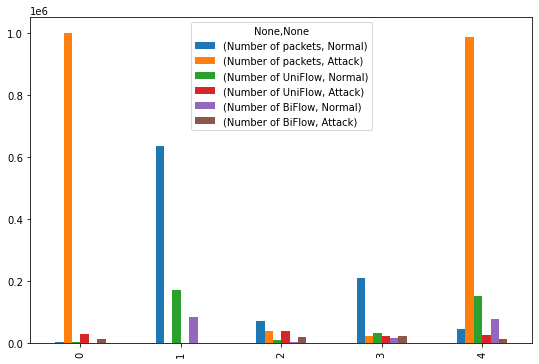

In [68]:
df_dist.iloc[:].plot(kind='bar',figsize=(9,6))

# Data Preprocessing

## Uni-Flow data

In [245]:
uni_df.head(5)

,ip_src,ip_dst,prt_src,prt_dst,proto,num_pkts,mean_iat,std_iat,min_iat,max_iat,mean_pkt_len,num_bytes,num_psh_flags,num_rst_flags,num_urg_flags,std_pkt_len,min_pkt_len,max_pkt_len,is_attack
0,10.0.0.17,192.168.1.7,45498,1883,6,7,0.000402,0.000395,0.000027,0.001236,63.571429,445,3,0,0,17.203464,52.0,102.0,normal
1,192.168.2.5,192.168.1.7,51509,1883,6,351,3.286615,10.063522,0.000005,73.259551,59.849003,21007,70,0,0,12.154396,52.0,88.0,bruteforce
2,10.0.0.23,8.8.8.8,35493,53,17,2,5.249260,0.000000,5.249260,5.249260,75.000000,150,0,0,0,0.000000,75.0,75.0,normal
3,10.0.0.12,192.168.1.7,33308,1883,6,7,0.000268,0.000214,0.000058,0.000573,66.285714,464,3,0,0,19.717391,52.0,101.0,normal
4,10.0.0.19,192.168.2.5,44176,35087,6,1,0.000000,0.000000,0.000000,0.000000,40.000000,40,0,1,0,0.000000,40.0,40.0,scan_A


**Removing ip_src and ip_dst to eliminate feature Influence**

In [246]:
uni_df.drop(['ip_src','ip_dst','proto'],axis=1,inplace=True)

**Checking for categorical columns**

In [247]:
uni_df.select_dtypes(include=['object']).columns.tolist()

['is_attack']

No categorical columns except is_attack which is label column

### Dropping Highly Correlated features

In [248]:
cor_matrix = uni_df.corr().abs()

In [249]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

C:\Users\rafay\AppData\Local\Temp\ipykernel_15232\3673341754.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [250]:
to_drop_uni = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [251]:
uni_df=uni_df.drop(to_drop_uni, axis=1)

In [252]:
to_drop_uni.append('ip_src')
to_drop_uni.append('ip_dst')
to_drop_uni.append('proto')

In [253]:
uni_df.shape

(495525, 14)

## Bi-Flow data

In [78]:
bi_df.head(5)

,ip_src,ip_dst,prt_src,prt_dst,proto,fwd_num_pkts,bwd_num_pkts,fwd_mean_iat,bwd_mean_iat,fwd_std_iat,...,bwd_max_pkt_len,fwd_num_bytes,bwd_num_bytes,fwd_num_psh_flags,bwd_num_psh_flags,fwd_num_rst_flags,bwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags,is_attack
0,10.0.0.23,10.0.0.1,59422,53,17,2,2,3540.832641,3540.832633,0.000000,...,75.0,157,135,0,0,0,0,0,0,normal
1,10.0.0.5,192.168.1.7,56008,1883,6,7,5,0.000405,0.000506,0.000436,...,60.0,445,272,3,1,0,0,0,0,normal
2,10.0.0.16,192.168.1.7,35024,1883,6,7,5,0.000291,0.000323,0.000275,...,60.0,444,272,3,1,0,0,0,0,normal
3,10.0.0.16,192.168.1.7,55366,1883,6,7,5,0.000341,0.000394,0.000341,...,60.0,444,272,3,1,0,0,0,0,normal
4,10.0.0.16,192.168.1.7,60402,1883,6,7,5,0.000562,0.000657,0.000551,...,60.0,444,272,3,1,0,0,0,0,normal


**Removing ip_src and ip_dst to eliminate feature Influence**

In [79]:
bi_df.drop(['ip_src','ip_dst','proto'],axis=1,inplace=True)

**Checking for categorical columns**

In [80]:
bi_df.select_dtypes(include=['object']).columns.tolist()

['is_attack']

No categorical columns except is_attack which is label column

### Dropping Highly Correlated features

In [81]:
cor_matrix = bi_df.corr().abs()

In [82]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

C:\Users\rafay\AppData\Local\Temp\ipykernel_15232\3673341754.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [83]:
to_drop_bi = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [84]:
bi_df=bi_df.drop(to_drop_bi, axis=1)

In [85]:
to_drop_bi.append('ip_src')
to_drop_bi.append('ip_dst')
to_drop_bi.append('proto')

In [86]:
bi_df.shape

(259379, 16)

In [87]:
bi_df.head(5)

,prt_src,prt_dst,fwd_num_pkts,fwd_mean_iat,fwd_std_iat,fwd_max_iat,fwd_mean_pkt_len,bwd_mean_pkt_len,fwd_std_pkt_len,bwd_std_pkt_len,fwd_min_pkt_len,fwd_num_bytes,fwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags,is_attack
0,59422,53,2,3540.832641,0.000000,3540.832641,78.500000,67.5,7.500000,7.5,71.0,157,0,0,0,normal
1,56008,1883,7,0.000405,0.000436,0.001319,63.571429,54.4,17.203464,3.2,52.0,445,0,0,0,normal
2,35024,1883,7,0.000291,0.000275,0.000755,63.428571,54.4,16.884965,3.2,52.0,444,0,0,0,normal
3,55366,1883,7,0.000341,0.000341,0.000949,63.428571,54.4,17.128565,3.2,52.0,444,0,0,0,normal
4,60402,1883,7,0.000562,0.000551,0.001528,63.428571,54.4,16.884965,3.2,52.0,444,0,0,0,normal


## Packet data

### Dropping Highly Correlated features

In [88]:
cor_matrix = packet_df.corr().abs()

In [89]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

C:\Users\rafay\AppData\Local\Temp\ipykernel_15232\3673341754.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [90]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [91]:
packet_df=packet_df.drop(to_drop, axis=1)

In [92]:
packet_df.shape

(3014997, 17)

In [93]:
to_drop_packet.extend(to_drop)

# Modelling and Evaluation

In [254]:
from sklearn.metrics import classification_report,confusion_matrix

## Uniflow data

### Creating train test split

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
xtrain, xtest, ytrain, ytest = train_test_split(uni_df.drop('is_attack',axis=1), uni_df['is_attack'], test_size=0.20, random_state=42,stratify= uni_df['is_attack'])

In [257]:
xtrain=xtrain.values
ytrain=ytrain.values
xtest=xtest.values
ytest=ytest.values

### Scaling

In [258]:
from sklearn.preprocessing import MinMaxScaler

In [259]:
ss=MinMaxScaler()
ss.fit(xtrain)
xtrain=ss.transform(xtrain)
xtest=ss.transform(xtest)

### Random Forest Classifier

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rfc=RandomForestClassifier()

In [262]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [263]:
pred=rfc.predict(xtest)

In [264]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.98      0.99      5775
      normal       1.00      1.00      1.00     75237
      scan_A       1.00      1.00      1.00      7960
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00      5646

    accuracy                           1.00     99105
   macro avg       1.00      1.00      1.00     99105
weighted avg       1.00      1.00      1.00     99105



In [265]:
report_rfc=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression

In [267]:
lr=LogisticRegression(n_jobs=-1,max_iter=3000)

In [268]:
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=3000, n_jobs=-1)

In [269]:
pred=lr.predict(xtest)

In [270]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.98      0.99      5775
      normal       0.99      1.00      0.99     75237
      scan_A       1.00      0.94      0.97      7960
     scan_SU       0.92      0.99      0.95      4487
      sparta       1.00      1.00      1.00      5646

    accuracy                           0.99     99105
   macro avg       0.98      0.98      0.98     99105
weighted avg       0.99      0.99      0.99     99105



In [271]:
report_lr=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Decision Trees

In [272]:
from sklearn.tree import DecisionTreeClassifier

In [273]:
dtc=DecisionTreeClassifier()

In [274]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [275]:
pred=dtc.predict(xtest)

In [276]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       0.99      0.99      0.99      5775
      normal       1.00      1.00      1.00     75237
      scan_A       1.00      1.00      1.00      7960
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00      5646

    accuracy                           1.00     99105
   macro avg       1.00      1.00      1.00     99105
weighted avg       1.00      1.00      1.00     99105



In [277]:
report_dtc=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Naive Bayes

In [278]:
from sklearn.naive_bayes import GaussianNB

In [279]:
gnb=GaussianNB()

In [280]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [281]:
pred=gnb.predict(xtest)

In [282]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.98      0.99      5775
      normal       1.00      0.97      0.99     75237
      scan_A       0.84      1.00      0.91      7960
     scan_SU       0.92      1.00      0.96      4487
      sparta       1.00      1.00      1.00      5646

    accuracy                           0.98     99105
   macro avg       0.95      0.99      0.97     99105
weighted avg       0.98      0.98      0.98     99105



In [283]:
report_nb=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Support Vector Machines : Kernel Linear

In [284]:
from sklearn.svm import LinearSVC

In [285]:
svc_linear=LinearSVC()

In [286]:
svc_linear.fit(xtrain,ytrain)

LinearSVC()

In [287]:
pred=svc_linear.predict(xtest)

In [288]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.98      0.99      5775
      normal       0.99      1.00      1.00     75237
      scan_A       1.00      0.94      0.97      7960
     scan_SU       0.98      0.99      0.98      4487
      sparta       1.00      1.00      1.00      5646

    accuracy                           0.99     99105
   macro avg       0.99      0.98      0.99     99105
weighted avg       0.99      0.99      0.99     99105



In [289]:
report_svm=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### K nearest Neighbour

In [290]:
from sklearn.neighbors import KNeighborsClassifier

In [291]:
knn=KNeighborsClassifier()

In [292]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [293]:
pred=knn.predict(xtest)

In [294]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.98      0.99      5775
      normal       1.00      1.00      1.00     75237
      scan_A       1.00      1.00      1.00      7960
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00      5646

    accuracy                           1.00     99105
   macro avg       1.00      1.00      1.00     99105
weighted avg       1.00      1.00      1.00     99105



In [295]:
report_knn=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Combining results and outputting

In [296]:
report_uni=pd.concat([report_rfc,report_lr,report_dtc,report_nb,report_svm,report_knn],
                     keys=['Random Forest','Logistic Regression','Decision Trees','Naive bayes','Support Vector Machines','K Nearest Neighbour'])

In [297]:
report_uni.to_csv('UniFlow_results.csv')

## Bi-Flow data

### Creating train test split

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
xtrain, xtest, ytrain, ytest = train_test_split(bi_df.drop('is_attack',axis=1), bi_df['is_attack'], test_size=0.20, random_state=42,stratify= bi_df['is_attack'])

In [140]:
xtrain=xtrain.values
ytrain=ytrain.values
xtest=xtest.values
ytest=ytest.values

### Scaling

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
ss=MinMaxScaler()
ss.fit(xtrain)
xtrain=ss.transform(xtrain)
xtest=ss.transform(xtest)

### Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc=RandomForestClassifier()

In [145]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [146]:
pred=rfc.predict(xtest)

In [147]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.98      0.99      2909
      normal       1.00      1.00      1.00     37676
      scan_A       1.00      1.00      1.00      3981
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00      2823

    accuracy                           1.00     51876
   macro avg       1.00      1.00      1.00     51876
weighted avg       1.00      1.00      1.00     51876



In [148]:
report_rfc=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
lr=LogisticRegression(n_jobs=-1,max_iter=3000)

In [151]:
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=3000, n_jobs=-1)

In [152]:
pred=lr.predict(xtest)

In [153]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       0.88      0.08      0.15      2909
      normal       0.93      1.00      0.96     37676
      scan_A       0.98      1.00      0.99      3981
     scan_SU       1.00      0.99      0.99      4487
      sparta       1.00      1.00      1.00      2823

    accuracy                           0.94     51876
   macro avg       0.96      0.81      0.82     51876
weighted avg       0.94      0.94      0.92     51876



In [154]:
report_lr=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Decision Trees

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
dtc=DecisionTreeClassifier()

In [157]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [158]:
pred=dtc.predict(xtest)

In [159]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       0.98      0.99      0.99      2909
      normal       1.00      1.00      1.00     37676
      scan_A       1.00      1.00      1.00      3981
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00      2823

    accuracy                           1.00     51876
   macro avg       1.00      1.00      1.00     51876
weighted avg       1.00      1.00      1.00     51876



In [160]:
report_dtc=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Naive Bayes

In [161]:
from sklearn.naive_bayes import GaussianNB

In [162]:
gnb=GaussianNB()

In [163]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [164]:
pred=gnb.predict(xtest)

In [165]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.97      0.99      2909
      normal       1.00      0.98      0.99     37676
      scan_A       0.87      1.00      0.93      3981
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00      2823

    accuracy                           0.99     51876
   macro avg       0.97      0.99      0.98     51876
weighted avg       0.99      0.99      0.99     51876



In [166]:
report_nb=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Support Vector Machines : Kernel Linear

In [167]:
from sklearn.svm import LinearSVC

In [168]:
svc_linear=LinearSVC()

In [169]:
svc_linear.fit(xtrain,ytrain)

LinearSVC()

In [170]:
pred=svc_linear.predict(xtest)

In [171]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.97      0.98      2909
      normal       1.00      1.00      1.00     37676
      scan_A       0.99      1.00      1.00      3981
     scan_SU       1.00      0.99      1.00      4487
      sparta       1.00      1.00      1.00      2823

    accuracy                           1.00     51876
   macro avg       1.00      0.99      0.99     51876
weighted avg       1.00      1.00      1.00     51876



In [172]:
report_svm=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### K nearest Neighbour

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
knn=KNeighborsClassifier()

In [175]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [176]:
pred=knn.predict(xtest)

In [177]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      0.97      0.98      2909
      normal       1.00      1.00      1.00     37676
      scan_A       1.00      1.00      1.00      3981
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00      2823

    accuracy                           1.00     51876
   macro avg       1.00      0.99      1.00     51876
weighted avg       1.00      1.00      1.00     51876



In [178]:
report_knn=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Combining results and outputting

In [179]:
report_bi=pd.concat([report_rfc,report_lr,report_dtc,report_nb,report_svm,report_knn],
                     keys=['Random Forest','Logistic Regression','Decision Trees','Naive bayes','Support Vector Machines','K Nearest Neighbour'])

In [180]:
report_bi.to_csv('BiFlow_results.csv')

## Packet Data

### Creating train test split

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
xtrain, xtest, ytrain, ytest = train_test_split(packet_df.drop('is_attack',axis=1), packet_df['is_attack'], test_size=0.20, random_state=42,stratify= packet_df['is_attack'])

### Encoding and Scaling data

In [183]:
cols=xtrain.columns
cols=list(cols)
cols.remove('protocol')

In [184]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [185]:
mct=make_column_transformer((BinaryEncoder(),['protocol']),
                            (MinMaxScaler(),cols))

In [186]:
mct.fit(xtrain)

ColumnTransformer(transformers=[('binaryencoder', BinaryEncoder(),
                                 ['protocol']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['ttl', 'ip_len', 'ip_flag_df', 'ip_flag_mf',
                                  'src_port', 'dst_port', 'tcp_flag_res',
                                  'tcp_flag_ack', 'tcp_flag_push',
                                  'tcp_flag_reset', 'tcp_flag_syn',
                                  'tcp_flag_fin', 'mqtt_messagetype',
                                  'mqtt_messagelength', 'mqtt_flag_uname'])])

In [187]:
xtrain=mct.transform(xtrain)
xtest=mct.transform(xtest)

In [188]:
ytrain=ytrain.values
ytest=ytest.values

In [189]:
xtrain.shape

(2411997, 20)

### Random Forest Classifier

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rfc=RandomForestClassifier(n_estimators = 10,n_jobs=-1)

In [192]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [193]:
pred=rfc.predict(xtest)

In [194]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       0.99      1.00      0.99    199972
      normal       1.00      0.99      0.99    193229
      scan_A       1.00      1.00      1.00      8125
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00    197187

    accuracy                           1.00    603000
   macro avg       1.00      1.00      1.00    603000
weighted avg       1.00      1.00      1.00    603000



In [195]:
report_rfc=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
lr=LogisticRegression(solver='sag',n_jobs=-1,max_iter=1000)

In [198]:
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000, n_jobs=-1, solver='sag')

In [199]:
pred=lr.predict(xtest)

In [200]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       0.50      0.86      0.63    199972
      normal       0.68      0.47      0.56    193229
      scan_A       0.94      0.99      0.97      8125
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      0.59      0.74    197187

    accuracy                           0.65    603000
   macro avg       0.83      0.78      0.78    603000
weighted avg       0.73      0.65      0.65    603000



In [201]:
report_lr=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Decision Trees

In [202]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
dtc=DecisionTreeClassifier()

In [204]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [205]:
pred=dtc.predict(xtest)

In [206]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       1.00      1.00      1.00    199972
      normal       1.00      1.00      1.00    193229
      scan_A       1.00      1.00      1.00      8125
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00    197187

    accuracy                           1.00    603000
   macro avg       1.00      1.00      1.00    603000
weighted avg       1.00      1.00      1.00    603000



In [207]:
report_dtc=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Naive Bayes

In [208]:
from sklearn.naive_bayes import GaussianNB

In [209]:
gnb=GaussianNB()

In [210]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [211]:
pred=gnb.predict(xtest)

In [212]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       0.51      0.20      0.29    199972
      normal       1.00      0.19      0.32    193229
      scan_A       0.68      1.00      0.81      8125
     scan_SU       1.00      1.00      1.00      4487
      sparta       0.41      0.98      0.58    197187

    accuracy                           0.47    603000
   macro avg       0.72      0.67      0.60    603000
weighted avg       0.64      0.47      0.40    603000



In [213]:
report_nb=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Support Vector Machines : Kernel Linear

In [214]:
from sklearn.svm import LinearSVC

In [215]:
svc_linear=LinearSVC()

In [216]:
svc_linear.fit(xtrain,ytrain)

LinearSVC()

In [217]:
pred=svc_linear.predict(xtest)

In [218]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       0.50      0.86      0.63    199972
      normal       0.69      0.47      0.56    193229
      scan_A       0.95      0.99      0.97      8125
     scan_SU       0.99      0.99      0.99      4487
      sparta       1.00      0.59      0.74    197187

    accuracy                           0.65    603000
   macro avg       0.83      0.78      0.78    603000
weighted avg       0.73      0.65      0.65    603000



In [219]:
report_svm=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### K nearest Neighbour

In [220]:
from sklearn.neighbors import KNeighborsClassifier

In [221]:
knn=KNeighborsClassifier(n_jobs=-1)

In [222]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_jobs=-1)

In [223]:
pred=knn.predict(xtest)

In [224]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

  bruteforce       0.94      0.97      0.95    199972
      normal       0.97      0.93      0.95    193229
      scan_A       1.00      1.00      1.00      8125
     scan_SU       1.00      1.00      1.00      4487
      sparta       1.00      1.00      1.00    197187

    accuracy                           0.97    603000
   macro avg       0.98      0.98      0.98    603000
weighted avg       0.97      0.97      0.97    603000



In [225]:
report_knn=pd.DataFrame(classification_report(ytest,pred,output_dict=True)).transpose()

### Combining results and outputting

In [226]:
report_packet=pd.concat([report_rfc,report_lr,report_dtc,report_nb,report_svm,report_knn],
                     keys=['Random Forest','Logistic Regression','Decision Trees','Naive bayes','Support Vector Machines','K Nearest Neighbour'])

In [227]:
report_packet.to_csv('Packet_results.csv')

In [228]:
to_drop_packet

['timestamp',
 'src_ip',
 'dst_ip',
 ['ip_flag_rb',
  'tcp_flag_ns',
  'tcp_flag_cwr',
  'tcp_flag_ecn',
  'tcp_flag_urg',
  'mqtt_flag_passwd',
  'mqtt_flag_retain',
  'mqtt_flag_qos',
  'mqtt_flag_willflag',
  'mqtt_flag_clean',
  'mqtt_flag_reserved']]

In [229]:
to_drop_bi

['bwd_num_pkts',
 'bwd_mean_iat',
 'bwd_std_iat',
 'fwd_min_iat',
 'bwd_min_iat',
 'bwd_max_iat',
 'bwd_min_pkt_len',
 'fwd_max_pkt_len',
 'bwd_max_pkt_len',
 'bwd_num_bytes',
 'fwd_num_psh_flags',
 'bwd_num_psh_flags',
 'bwd_num_rst_flags',
 'ip_src',
 'ip_dst',
 'proto']

In [230]:
to_drop_uni

['min_iat', 'max_pkt_len', 'ip_src', 'ip_dst', 'proto']